# Trustworthiness Measurement

In this notebook we will just see the trust worthiness of the various Renyi SNE embeddings. 

In [2]:
import numpy as np
from sklearn.manifold import t_sne

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import os

In [4]:
files = os.listdir(os.getcwd())
alphas = [0.1, 0.2, 0.5, 0.7, 0.9, 0.95, 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]

In [15]:
di = [i for i in files if "Digits_renyi_2d" in i and ".txt" in i]
di

['Digits_renyi_2d_0.1.txt',
 'Digits_renyi_2d_0.2.txt',
 'Digits_renyi_2d_0.5.txt',
 'Digits_renyi_2d_0.7.txt',
 'Digits_renyi_2d_0.9.txt',
 'Digits_renyi_2d_0.95.txt',
 'Digits_renyi_2d_1.05.txt',
 'Digits_renyi_2d_1.1.txt',
 'Digits_renyi_2d_1.2.txt',
 'Digits_renyi_2d_1.3.txt',
 'Digits_renyi_2d_1.4.txt',
 'Digits_renyi_2d_1.5.txt',
 'Digits_renyi_2d_1.6.txt',
 'Digits_renyi_2d_1.6_15000.txt',
 'Digits_renyi_2d_2_15000.txt',
 'Digits_renyi_2d_3_10000.txt',
 'Digits_renyi_2d_3_15000.txt',
 'Digits_renyi_2d_3_20000.txt',
 'Digits_renyi_2d_seed_1_1.6_1000.txt',
 'Digits_renyi_2d_seed_1_2_1000.txt',
 'Digits_renyi_2d_seed_1_3_1000.txt',
 'Digits_renyi_2d_seed_1_eta_101.6_1000.txt',
 'Digits_renyi_2d_seed_1_eta_102_1000.txt',
 'Digits_renyi_2d_seed_1_eta_103_1000.txt']

In [51]:
di[19]

'Digits_renyi_2d_seed_1_2_1000.txt'

In [55]:
di1 = di[:12] 
tmp = [di[21],di[19]]#, di[20]]
di1 = di1 + tmp
#di1.append()
di1

['Digits_renyi_2d_0.1.txt',
 'Digits_renyi_2d_0.2.txt',
 'Digits_renyi_2d_0.5.txt',
 'Digits_renyi_2d_0.7.txt',
 'Digits_renyi_2d_0.9.txt',
 'Digits_renyi_2d_0.95.txt',
 'Digits_renyi_2d_1.05.txt',
 'Digits_renyi_2d_1.1.txt',
 'Digits_renyi_2d_1.2.txt',
 'Digits_renyi_2d_1.3.txt',
 'Digits_renyi_2d_1.4.txt',
 'Digits_renyi_2d_1.5.txt',
 'Digits_renyi_2d_seed_1_eta_101.6_1000.txt',
 'Digits_renyi_2d_seed_1_2_1000.txt']

In [56]:
# alphas for digits
alphas = [0.1, 0.2, 0.5, 0.7, 0.9, 0.95, 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, \
           2]

In [19]:
len(alphas), len(trust)

(24, 24)

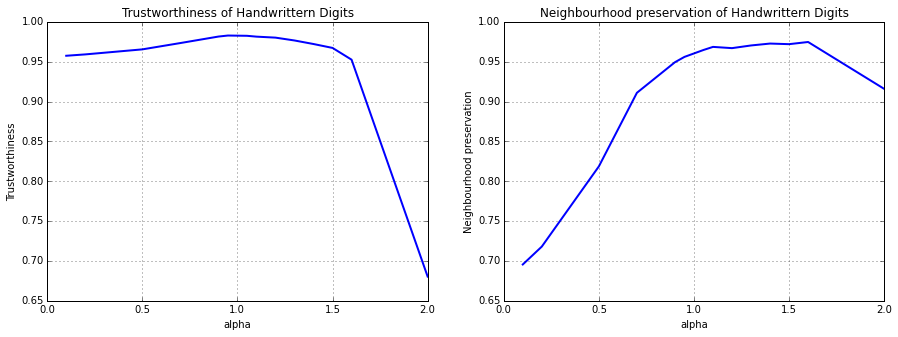

In [62]:
# alphas for digits
alphas = [0.1, 0.2, 0.5, 0.7, 0.9, 0.95, 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, \
           2]

X = np.loadtxt('mnist2500_X.txt')
labels = np.loadtxt('mnist2500_labels.txt')
trust = []
nbrs = []

for f in di1:
    X_embed = np.loadtxt(f)
    t = t_sne.trustworthiness(X, X_embed, n_neighbors = 5)
    t1 = t_sne.trustworthiness(X_embed, X, n_neighbors = 5)
    trust.append(t)
    nbrs.append(t1)
    #print f, t

        
fig = plt.figure(figsize  = (15, 5))

    
ax = fig.add_subplot(121)
ax.plot(alphas, trust, linewidth = 2)
ax.set_xlabel('alpha')
ax.set_ylabel("Trustworthiness")
ax.set_title("Trustworthiness of Handwrittern Digits")
# plt.setp(xticklines, 'linewidth', 3)
# plt.setp(yticklines, 'linewidth', 3)
ax.grid('on')


ax1 = fig.add_subplot(122)
ax1.plot(alphas, nbrs, linewidth = 2)
ax1.set_xlabel('alpha')
ax1.set_ylabel("Neighbourhood preservation")
ax1.set_title("Neighbourhood preservation of Handwrittern Digits")
ax1.grid('on')
plt.show()
    

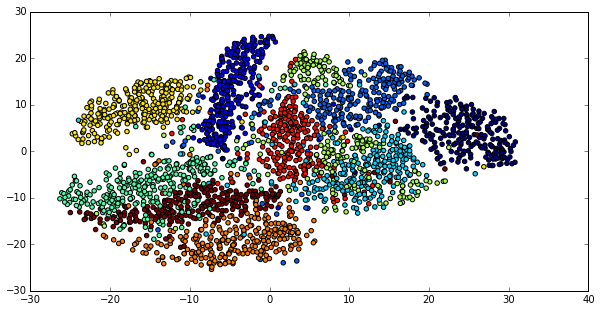

In [44]:
X = np.loadtxt('mnist2500_pca_50.txt')
labels = np.loadtxt('mnist2500_labels.txt')


trust = []
nbrs = []


X_embed = np.loadtxt('Digits_renyi_2d_seed_1_eta_101.6_1000.txt')
#X_embed = np.loadtxt('Digits_renyi_2d_seed_1_2_1000.txt')
#X_embed = np.loadtxt('Digits_renyi_2d_seed_1_3_1000.txt')

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.scatter(X_embed[:, 0], X_embed[:, 1], c = labels)
plt.show()

In [45]:
print t_sne.trustworthiness(X_embed, X, n_neighbors = 5 )
print t_sne.trustworthiness(X, X_embed, n_neighbors = 5)

0.97979540931
0.957220609952


In [37]:
t_sne.trustworthiness(X_embed, X, n_neighbors = 2)


0.95721081514119766

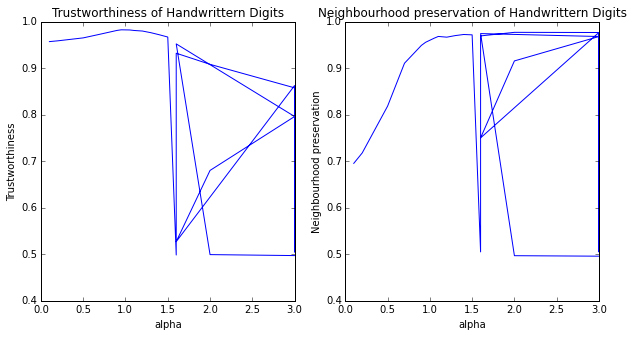

In [20]:
# this is for the Digits data
X = np.loadtxt('mnist2500_pca_50.txt')
trust = []
nbrs = []
for f in files:
    if "Digits_renyi_2d" in f and ".txt" in f:
        X_embed = np.loadtxt(f)
        t = t_sne.trustworthiness(X, X_embed, n_neighbors = 5)
        t1 = t_sne.trustworthiness(X_embed, X, n_neighbors = 5)
        trust.append(t)
        nbrs.append(t1)
        #print f, t

        
fig = plt.figure(figsize  = (10, 5))

    
ax = fig.add_subplot(121)
ax.plot(alphas, trust)
ax.set_xlabel('alpha')
ax.set_ylabel("Trustworthiness")
ax.set_title("Trustworthiness of Handwrittern Digits")

ax1 = fig.add_subplot(122)
ax1.plot(alphas, nbrs)
ax1.set_xlabel('alpha')
ax1.set_ylabel("Neighbourhood preservation")
ax1.set_title("Neighbourhood preservation of Handwrittern Digits")
plt.show()

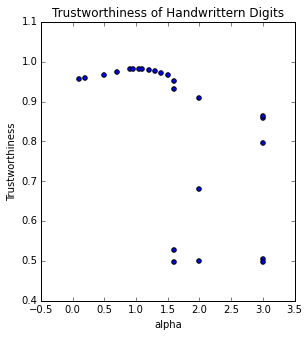

In [21]:
fig = plt.figure(figsize  = (10, 5))

    
ax = fig.add_subplot(121)
ax.scatter(alphas, trust)
ax.set_xlabel('alpha')
ax.set_ylabel("Trustworthiness")
ax.set_title("Trustworthiness of Handwrittern Digits")

In [9]:
len(trust), len(alphas)

(18, 13)

In [ ]:
fig = plt.figure(figsize  = (15, 4))
fig.suptitle('Handwritten Digits')
    
ax = fig.add_subplot(121)
ax.plot(alphas, trust, linewidth = 2)
ax.set_xlabel('alpha')
ax.set_ylabel("Trustworthiness")
ax.set_title("Trustworthiness")

ax1 = fig.add_subplot(122)
ax1.plot(alphas, nbrs, linewidth = 2)
ax1.set_xlabel('alpha')
ax1.set_ylabel("Neighbourhood preservation")
ax1.set_title("Neighbourhood preservation")
plt.show()

In [ ]:
# this is for the Digits data
X = np.loadtxt('mnist2500_X.txt')
trust = []
for f in files:
    if "Digits_renyi_2d" in f and ".txt" in f:
        X_embed = np.loadtxt(f)
        t = t_sne.trustworthiness(X_embed, X, n_neighbors = 5)
        trust.append(t)
        #print f, t
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, trust)
ax.set_xlabel('alpha')
ax.set_ylabel("Neighbourhood preservation")
ax.set_title("Neighbourhood preservation of Handwrittern Digits")
plt.show()

In [ ]:
# this if for Olivetti data

X = np.loadtxt('olivetti_pca_50.csv', delimiter = ',')

trust = []
for f in files:
    if "Olivetti_renyi_2d" in f:
        X_embed = np.loadtxt(f)
        t = t_sne.trustworthiness(X, X_embed, n_neighbors = 5)
        trust.append(t)
        #print f, t
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, trust)

plt.show()

In [ ]:
# this if for Olivetti data

X = np.loadtxt('olivetti_pca_50.csv', delimiter = ',')

trust = []
for f in files:
    if "Olivetti_renyi_2d" in f:
        X_embed = np.loadtxt(f)
        t = t_sne.trustworthiness(X_embed, X, n_neighbors = 5)
        trust.append(t)
        #print f, t
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, trust)
plt.show()

In [ ]:
# this is for COIL dataset

X = np.loadtxt('COIL-20_pca_50.txt')

trust = []
nbrs = []
for f in files:
    if "COIL_renyi_2d_" in f and ".txt" in f:
        X_embed = np.loadtxt(f)
        t = t_sne.trustworthiness(X, X_embed, n_neighbors = 5)
        t1 = t_sne.trustworthiness(X_embed, X, n_neighbors = 5)
        trust.append(t)
        nbrs.append(t1)
        #print f, t

        

fig = plt.figure(figsize  = (15, 4))
fig.suptitle("COIL-20")
    
ax = fig.add_subplot(121)
ax.plot(alphas, trust, linewidth = 2)
ax.set_xlabel('alpha')
ax.set_ylabel("Trustworthiness")
ax.set_title("Trustworthiness")

ax1 = fig.add_subplot(122)
ax1.plot(alphas, nbrs, linewidth = 2)
ax1.set_xlabel('alpha')
ax1.set_ylabel("Neighbourhood preservation")
ax1.set_title("Neighbourhood preservation")
plt.show()

In [ ]:
X = np.loadtxt('COIL-20_pca_50.txt')

trust = []
for f in files:
    if "COIL_renyi_2d_" in f:
        X_embed = np.loadtxt(f)
        t = t_sne.trustworthiness(X_embed, X, n_neighbors = 5)
        trust.append(t)
        #print f, t
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, trust)
plt.show()

In [ ]:
# this is 3D points of Digit Data

X = np.loadtxt('mnist2500_X.txt')
for f in files:
    if "Digits_renyi_3d" in f:
        X_embed = np.loadtxt(f)
        print f, t_sne.trustworthiness(X, X_embed, n_neighbors = 5)


In [ ]:
# this is for 3D points Olivetti data

X = np.loadtxt('olivetti_pca_50.csv', delimiter = ',')

for f in files:
    if "Olivetti_renyi_3d" in f:
        X_embed = np.loadtxt(f)
        print f, t_sne.trustworthiness(X, X_embed, n_neighbors = 5)

# COIL-20 dataset plots

In [5]:
files = os.listdir(os.getcwd())
alphas = [0.1, 0.2, 0.5, 0.7, 0.9, 0.95, 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]

In [7]:
co = [i for i in files if "COIL_renyi_2d_" in i and ".txt" in i]
co

['COIL_renyi_2d_0.1.txt',
 'COIL_renyi_2d_0.2.txt',
 'COIL_renyi_2d_0.5.txt',
 'COIL_renyi_2d_0.7.txt',
 'COIL_renyi_2d_0.9.txt',
 'COIL_renyi_2d_0.95.txt',
 'COIL_renyi_2d_1.05.txt',
 'COIL_renyi_2d_1.1.txt',
 'COIL_renyi_2d_1.2.txt',
 'COIL_renyi_2d_1.3.txt',
 'COIL_renyi_2d_1.4.txt',
 'COIL_renyi_2d_1.5.txt',
 'COIL_renyi_2d_1.5_500.txt',
 'COIL_renyi_2d_1.6.txt',
 'COIL_renyi_2d_1.6_500.txt',
 'COIL_renyi_2d_1.7_500.txt',
 'COIL_renyi_2d_2_500.txt',
 'COIL_renyi_2d_3_500.txt',
 'COIL_renyi_2d_3_5000.txt',
 'COIL_renyi_2d_3_50001.txt',
 'COIL_renyi_2d_ver3_0.1.txt',
 'COIL_renyi_2d_ver3_0.5.txt',
 'COIL_renyi_2d_ver3_0.95.txt',
 'COIL_renyi_2d_ver3_1.1.txt',
 'COIL_renyi_2d_ver3_1.4.txt',
 'COIL_renyi_2d_ver3_1.5.txt',
 'COIL_renyi_2d_ver3_1.6.txt',
 'COIL_renyi_2d_ver3_2.txt',
 'COIL_renyi_2d_ver4_1.4.txt',
 'COIL_renyi_2d_ver4_1.5.txt',
 'COIL_renyi_2d_ver4_1.6.txt',
 'COIL_renyi_2d_ver4_2.txt',
 'COIL_renyi_2d_ver5_2.txt']

In [16]:
co[-3], co[-1]

('COIL_renyi_2d_ver4_1.6.txt', 'COIL_renyi_2d_ver5_2.txt')

In [18]:
co1 = co[:12]
co1 = co1 + [co[-3], co[-1]]
co1

['COIL_renyi_2d_0.1.txt',
 'COIL_renyi_2d_0.2.txt',
 'COIL_renyi_2d_0.5.txt',
 'COIL_renyi_2d_0.7.txt',
 'COIL_renyi_2d_0.9.txt',
 'COIL_renyi_2d_0.95.txt',
 'COIL_renyi_2d_1.05.txt',
 'COIL_renyi_2d_1.1.txt',
 'COIL_renyi_2d_1.2.txt',
 'COIL_renyi_2d_1.3.txt',
 'COIL_renyi_2d_1.4.txt',
 'COIL_renyi_2d_1.5.txt',
 'COIL_renyi_2d_ver4_1.6.txt',
 'COIL_renyi_2d_ver5_2.txt']

In [13]:
co[11]

'COIL_renyi_2d_1.5.txt'

In [21]:
alphas = [0.1, 0.2, 0.5, 0.7, 0.9, 0.95, 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 2]

In [19]:
labels = np.loadtxt('COIL-20_labels.txt')
X = np.loadtxt('COIL-20_pca_50.txt')

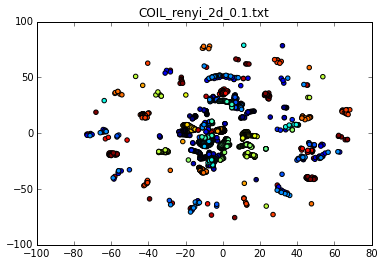

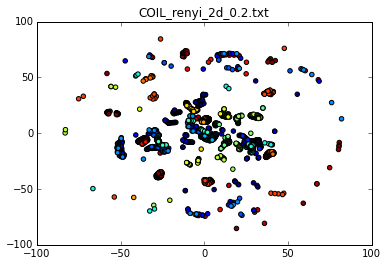

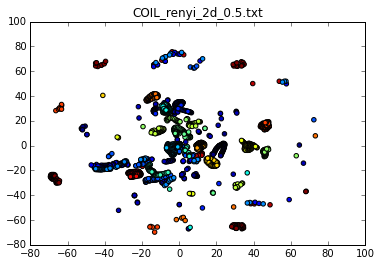

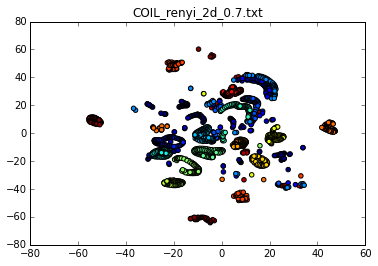

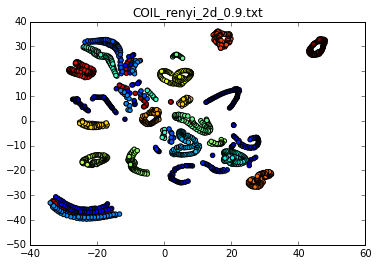

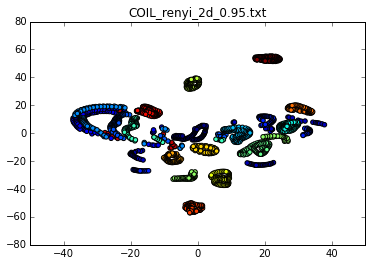

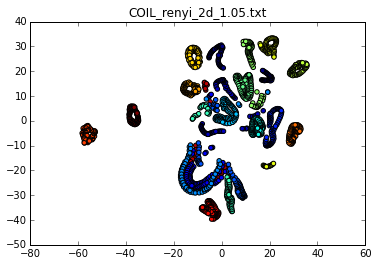

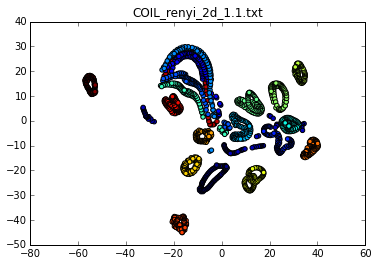

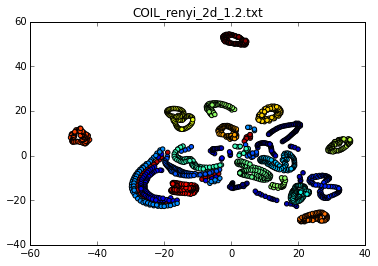

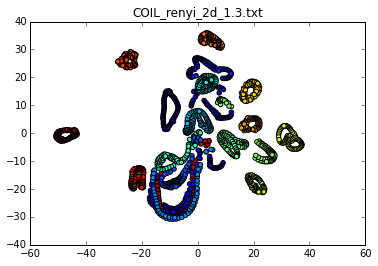

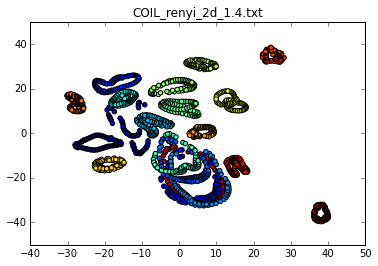

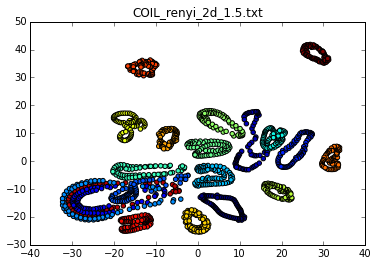

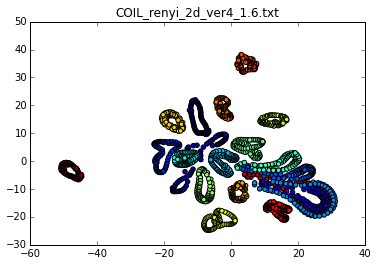

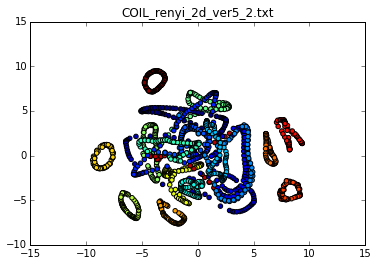

In [20]:
# labels = np.loadtxt('COIL-20_labels.txt')

for f in co1:
    X_embed = np.loadtxt(f)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_embed[:, 0], X_embed[:, 1], c = labels)
    ax.set_title(f)
    plt.show()

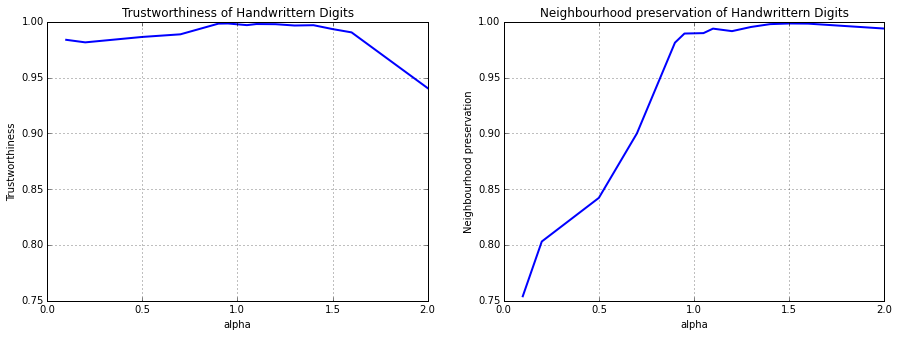

In [24]:
# alphas for digits
alphas = [0.1, 0.2, 0.5, 0.7, 0.9, 0.95, 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 2]

labels = np.loadtxt('COIL-20_labels.txt')
X = np.loadtxt('COIL-20_pca_50.txt')

#X = np.loadtxt('mnist2500_X.txt')
#labels = np.loadtxt('mnist2500_labels.txt')
trust = []
nbrs = []

for f in co1:
    X_embed = np.loadtxt(f)
    t = t_sne.trustworthiness(X, X_embed, n_neighbors = 5)
    t1 = t_sne.trustworthiness(X_embed, X, n_neighbors = 5)
    trust.append(t)
    nbrs.append(t1)
    #print f, t

        
fig = plt.figure(figsize  = (15, 5))

    
ax = fig.add_subplot(121)
ax.plot(alphas, trust, linewidth = 2)
ax.set_xlabel('alpha')
ax.set_ylabel("Trustworthiness")
ax.set_title("Trustworthiness of Handwrittern Digits")
ax.set_ylim(0.75, 1)
# plt.setp(xticklines, 'linewidth', 3)
# plt.setp(yticklines, 'linewidth', 3)
ax.grid('on')


ax1 = fig.add_subplot(122)
ax1.plot(alphas, nbrs, linewidth = 2)
ax1.set_xlabel('alpha')
ax1.set_ylabel("Neighbourhood preservation")
ax1.set_title("Neighbourhood preservation of Handwrittern Digits")
ax1.grid('on')
plt.show()
    

In [ ]:
# this is for COIL dataset

X = np.loadtxt('COIL-20_pca_50.txt')

for f in files:
    if "COIL_renyi_3d_" in f:
        X_embed = np.loadtxt(f)
        print f, t_sne.trustworthiness(X, X_embed, n_neighbors = 5)